### Importing libraries and dataset for training

In [1]:
#importing necessary libraries to handle and visualize data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#for building, training and validating the model
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [3]:
df_train = pd.read_csv("HPP_train.csv")

### Exploratory Data Analysis

In [4]:
#getting info on number of columns and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
#for categorical data
df_train.describe(include=['object']).transpose()

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [7]:
#for numerical features
df_train.describe(include=['int64','float64']).transpose()

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

### Splitting the target variable

In [8]:
target = df_train['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

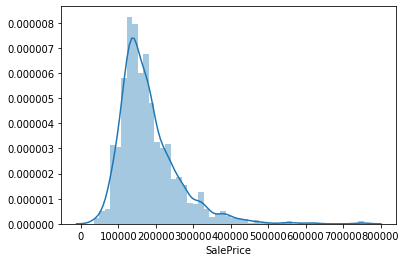

In [9]:
#visualizing the distribution of salesprice(dependent) variable
sns.distplot(target,hist=True)
plt.show()

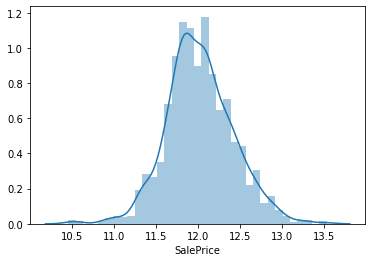

In [10]:
# for positive skewed we use log transformation 
# for negative skewed we use square root transformation
target_log = np.log1p(target)
sns.distplot(target_log,hist=True)
plt.show()

In [11]:
#drop the target variable
x_data = df_train.drop(["SalePrice"],axis=1)
x_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [12]:
#MSSubclass - the building class
x_data['MSSubClass']=x_data['MSSubClass'].astype(str)
x_data['OverallCond']=x_data['OverallCond'].astype(str)
x_data['YrSold']=x_data['YrSold'].astype(str)
x_data['MoSold']=x_data['MoSold'].astype(str)

In [13]:
#Adding total sqfootage feature
x_data['TotalSF'] = x_data['TotalBsmtSF'] + x_data['1stFlrSF'] + x_data['2ndFlrSF']
#Removing Totalbsmt,1stFlrsf,2ndFlrSF
x_data = x_data.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF','Id'],axis=1)

In [14]:
#save all categorical columns in list
categorical_columns = [col for col in x_data.columns.values if x_data[col].dtype == 'object']
#dataframe with categorical features
x_cat = x_data[categorical_columns]
x_num = x_data.drop(categorical_columns,axis =1)

In [15]:
x_cat.head().transpose()

0        1        2        3        4
MSSubClass          60       20       60       70       60
MSZoning            RL       RL       RL       RL       RL
Street            Pave     Pave     Pave     Pave     Pave
Alley              NaN      NaN      NaN      NaN      NaN
LotShape           Reg      Reg      IR1      IR1      IR1
LandContour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities       AllPub   AllPub   AllPub   AllPub   AllPub
LotConfig       Inside      FR2   Inside   Corner      FR2
LandSlope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood   CollgCr  Veenker  CollgCr  Crawfor  NoRidge
Condition1        Norm    Feedr     Norm     Norm     Norm
Condition2        Norm     Norm     Norm     Norm     Norm
BldgType          1Fam     1Fam     1Fam     1Fam     1Fam
HouseStyle      2Story   1Story   2Story   2Story   2Story
OverallCond          5        8        5        5        5
RoofStyle        Gable    Gable    Gable    Gable    Gable
RoofMatl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior1st    VinylSd  MetalSd  VinylSd  Wd Sdng  VinylSd
Exterior2nd    VinylSd  MetalSd  VinylSd  Wd Shng  VinylSd
MasVnrType     BrkFace     None  BrkFace     None  BrkFace
ExterQual           Gd       TA       Gd       TA       Gd
ExterCond           TA       TA       TA       TA       TA
Foundation       PConc   CBlock    PConc   BrkTil    PConc
BsmtQual            Gd       Gd       Gd       TA       Gd
BsmtCond            TA       TA       TA       Gd       TA
BsmtExposure        No       Gd       Mn       No       Av
BsmtFinType1       GLQ      ALQ      GLQ      ALQ      GLQ
BsmtFinType2       Unf      Unf      Unf      Unf      Unf
Heating           GasA     GasA     GasA     GasA     GasA
HeatingQC           Ex       Ex       Ex       Gd       Ex
CentralAir           Y        Y        Y        Y        Y
Electrical       SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
KitchenQual         Gd       TA       Gd       Gd       Gd
Functional         Typ      Typ      Typ      Typ      Typ
FireplaceQu        NaN       TA       TA       Gd       TA
GarageType      Attchd   Attchd   Attchd   Detchd   Attchd
GarageFinish       RFn      RFn      RFn      Unf      RFn
GarageQual          TA       TA       TA       TA       TA
GarageCond          TA       TA       TA       TA       TA
PavedDrive           Y        Y        Y        Y        Y
PoolQC             NaN      NaN      NaN      NaN      NaN
Fence              NaN      NaN      NaN      NaN      NaN
MiscFeature        NaN      NaN      NaN      NaN      NaN
MoSold               2        5        9        2       12
YrSold            2008     2007     2008     2006     2008
SaleType            WD       WD       WD       WD       WD
SaleCondition   Normal   Normal   Normal  Abnorml   Normal

In [16]:
x_num.describe().transpose()

count          mean          std     min     25%     50%  \
LotFrontage    1201.0     70.049958    24.284752    21.0    59.0    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.5  9478.5   
OverallQual    1460.0      6.099315     1.382997     1.0     5.0     6.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.0  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.0  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.0     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.0   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.0     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.0   477.5   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.0     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.5  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.0     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.0     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.0     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.0     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.0     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.0     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.0     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.0     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.0  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.0     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.5   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.0     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.0    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.0     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.0     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.0     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.0     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.0     0.0   
TotalSF        1460.0   2567.048630   821.714421   334.0  2009.5  2474.0   

                    75%       max  
LotFrontage       80.00     313.0  
LotArea        11601.50  215245.0  
OverallQual        7.00      10.0  
YearBuilt       2000.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       166.00    1600.0  
BsmtFinSF1       712.25    5644.0  
BsmtFinSF2         0.00    1474.0  
BsmtUnfSF        808.00    2336.0  
LowQualFinSF       0.00     572.0  
GrLivArea       1776.75    5642.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      14.0  
Fireplaces         1.00       3.0  
GarageYrBlt     2002.00    2010.0  
GarageCars         2.00       4.0  
GarageArea       576.00    1418.0  
WoodDeckSF       168.00     857.0  
OpenPorchSF       68.00     547.0  
EnclosedPorch      0.00     552.0  
3SsnPorch          0.00     508.0  
ScreenPorch        0.00     480.0  
PoolArea           0.00     738.0  
MiscVal            0.00   15500.0  
TotalSF         3004.00   11752.0

In [17]:
x_num_skew = x_num.skew()
x_num_skew

LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
TotalSF           1.776700
dtype: float64

In [18]:
x_num_skew1=x_num_skew[(x_num_skew > 0.75)]
x_num_skew2 = x_num_skew[(x_num_skew<-0.5)]

In [19]:
#apply log +1 and cube root transformation transformation for all numeric features with skewness
x_num[x_num_skew1.index] = np.log1p(x_num[x_num_skew1.index])
x_num[x_num_skew2.index] = np.cbrt(x_num[x_num_skew2.index])

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log1p
  


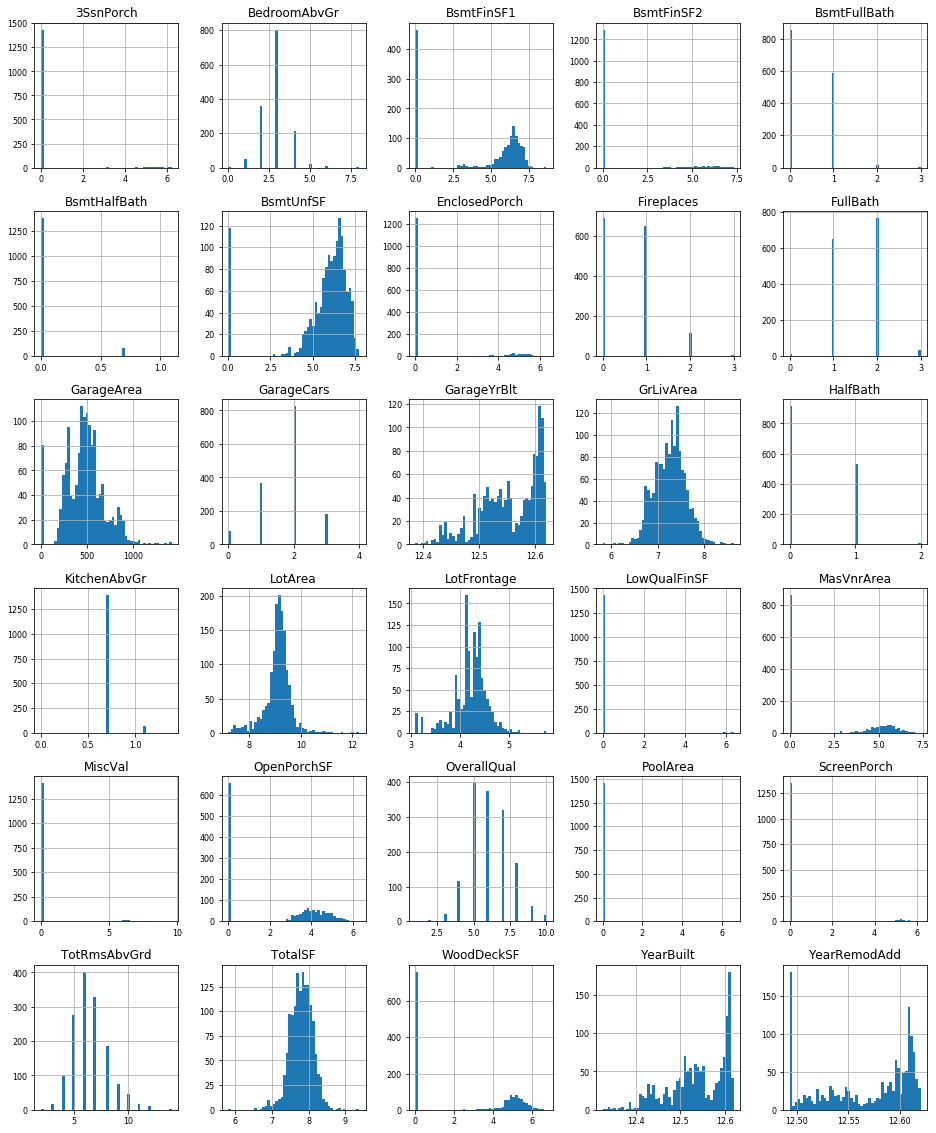

In [20]:
x_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)
plt.show()

### Standardization

In [21]:
x_num = (x_num - x_num.mean())/(x_num.std())
x_num.head()

LotFrontage   LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0    -0.050412 -0.133225     0.651256   1.046768      0.877617    1.197621   
1     0.541089  0.113374    -0.071812   0.161161     -0.425837   -0.810236   
2     0.077976  0.419905     0.651256   0.981441      0.829551    1.125620   
3    -0.277953  0.103282     0.651256  -1.869783     -0.717104   -0.810236   
4     0.680309  0.878130     1.374324   0.948762      0.733370    1.417129   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  LowQualFinSF  ...  GarageCars  \
0    0.779164   -0.355221  -0.340394     -0.133557  ...    0.311618   
1    0.887953   -0.355221   0.002218     -0.133557  ...    0.311618   
2    0.654579   -0.355221   0.230293     -0.133557  ...    0.311618   
3    0.384407   -0.355221   0.347915     -0.133557  ...    1.649742   
4    0.754141   -0.355221   0.295610     -0.133557  ...    1.649742   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.350880   -0.946377     0.844919      -0.404106  -0.128477    -0.292669   
1   -0.060710    1.249112    -1.072549      -0.404106  -0.128477    -0.292669   
2    0.631510   -0.946377     0.674906      -0.404106  -0.128477    -0.292669   
3    0.790533   -0.946377     0.592355       2.843400  -0.128477    -0.292669   
4    1.697903    1.080514     0.991509      -0.404106  -0.128477    -0.292669   

   PoolArea   MiscVal   TotalSF  
0 -0.069369 -0.190416  0.151899  
1 -0.069369 -0.190416  0.099264  
2 -0.069369 -0.190416  0.321333  
3 -0.069369 -0.190416  0.034159  
4 -0.069369 -0.190416  0.995602  

[5 rows x 30 columns]

### Missing Values treatment

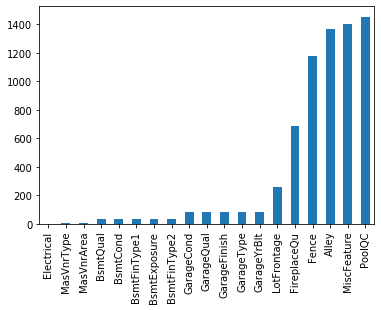

In [22]:
# first we'll visualize null count in overall dataframe
null_in_x = x_data.isnull().sum()
null_in_x = null_in_x[null_in_x>0]
null_in_x.sort_values(inplace=True)
null_in_x.plot.bar()
plt.show()

In [23]:
na_col = null_in_x.index.values
print(na_col)

['Electrical' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtFinType1' 'BsmtExposure' 'BsmtFinType2' 'GarageCond' 'GarageQual'
 'GarageFinish' 'GarageType' 'GarageYrBlt' 'LotFrontage' 'FireplaceQu'
 'Fence' 'Alley' 'MiscFeature' 'PoolQC']


In [24]:
#for categorical values
for (colname, colvalues) in x_cat.iteritems():
    if colname in na_col:
        if x_cat[colname].isnull().sum() > (.3*x_cat.shape[0]):
            x_cat.drop([colname],inplace=True,axis=1)
        else:
            x_cat[colname].fillna(x_cat[colname].mode().iloc[0],inplace=True)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [25]:
#for numerical values
for (colname, colvalues) in x_num.iteritems():
    if colname in na_col:
        if x_num[colname].isnull().sum() > (.3*x_num.shape[0]):
            x_num.drop([colname],inplace=True,axis=1)
        else:
            x_num[colname].fillna(x_num[colname].median(),inplace=True)

### Dummy Coding

In [26]:
#using pandas.get_dummies function to convert categorical variable into dummy/indicator variable
x_cat_dummies = pd.get_dummies(x_cat,drop_first=True)
#viewing dimensionalilty of the Dataframe
x_cat_dummies.head()

MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0              0  ...               0               0             0   
1              0  ...               0               0             0   
2              0  ...               0               0             0   
3              1  ...               0               0             0   
4              0  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 233 columns]

### Concatenating both the columns

In [27]:
x_new = pd.concat([x_num,x_cat_dummies],axis=1)

### Calculating the VIF factor for collinearity

In [28]:
#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_new.values,i) for i in range(x_new.shape[1])]
vif["Features"] = x_new.columns
vif.round(3)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor               Features
0         3.592            LotFrontage
1         6.047                LotArea
2         5.938            OverallQual
3        18.490              YearBuilt
4         3.902           YearRemodAdd
5        28.094             MasVnrArea
6        34.566             BsmtFinSF1
7        47.773             BsmtFinSF2
8         3.596              BsmtUnfSF
9         2.044           LowQualFinSF
10       34.506              GrLivArea
11        2.982           BsmtFullBath
12        1.489           BsmtHalfBath
13        4.224               FullBath
14        3.214               HalfBath
15        3.678           BedroomAbvGr
16        5.270           KitchenAbvGr
17        6.576           TotRmsAbvGrd
18        2.168             Fireplaces
19        5.303            GarageYrBlt
20        7.823             GarageCars
21        8.054             GarageArea
22        1.612             WoodDeckSF
23        1.933            OpenPorchSF
24        1.773          EnclosedPorch
25        1.300              3SsnPorch
26        1.322            ScreenPorch
27        1.577               PoolArea
28        1.342                MiscVal
29       24.894                TotalSF
..          ...                    ...
233       1.766           PavedDrive_P
234       2.608           PavedDrive_Y
235       3.106              MoSold_10
236       2.768              MoSold_11
237       2.409              MoSold_12
238       2.199               MoSold_2
239       3.312               MoSold_3
240       3.885               MoSold_4
241       4.874               MoSold_5
242       5.636               MoSold_6
243       5.441               MoSold_7
244       3.482               MoSold_8
245       2.435               MoSold_9
246       1.947            YrSold_2007
247       2.003            YrSold_2008
248       2.035            YrSold_2009
249       1.862            YrSold_2010
250       1.305           SaleType_CWD
251       1.213           SaleType_Con
252       1.753         SaleType_ConLD
253       1.303         SaleType_ConLI
254       1.466         SaleType_ConLw
255      52.298           SaleType_New
256       1.243           SaleType_Oth
257       5.877            SaleType_WD
258       1.695  SaleCondition_AdjLand
259       1.791   SaleCondition_Alloca
260       1.439   SaleCondition_Family
261       3.579   SaleCondition_Normal
262      49.382  SaleCondition_Partial

[263 rows x 2 columns]

In [29]:
drop_feat = []
for i in vif.index.values:
    if vif['VIF Factor'].iloc[i]>10.0:
        drop_feat.append(vif['Features'].iloc[i])

In [30]:
x_new1 = x_new.drop(drop_feat,axis=1)

## Model 1 : Without removing Multicollinearity

In [31]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(x_new,target_log,test_size=0.30,random_state=0)
print("X_train1",X_train1.shape)
print("X_test1",X_test1.shape)
print("Y_train1",Y_train1.shape)
print("Y_test1",Y_test1.shape)

X_train1 (1022, 263)
X_test1 (438, 263)
Y_train1 (1022,)
Y_test1 (438,)


In [32]:
#Building Linear Regression model using OLS
model1 = sm.OLS(Y_train1,X_train1).fit()
#first y then x - imp

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     68.13
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:16:53   Log-Likelihood:                 1093.3
No. Observations:                1022   AIC:                            -1679.
Df Residuals:                     768   BIC:                            -426.6
Df Model:                         253                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0075      0.007      1.134      0.257      -0.005       0.020
LotArea                   0.0523      0.008      6.545      0.000       0.037       0.068
OverallQual               0.0474      0.008      6.197      0.000       0.032       0.062
YearBuilt                 0.0537      0.014      3.809      0.000       0.026       0.081
YearRemodAdd              0.0172      0.006      2.694      0.007       0.005       0.030
MasVnrArea                0.0221      0.018      1.251      0.211      -0.013       0.057
BsmtFinSF1                0.0404      0.019      2.112      0.035       0.003       0.078
BsmtFinSF2                0.0185      0.020      0.924      0.356      -0.021       0.058
BsmtUnfSF                -0.0067      0.006     -1.074      0.283      -0.019       0.006
LowQualFinSF             -0.0021      0.004     -0.472      0.637      -0.011       0.007
GrLivArea                 0.0767      0.020      3.826      0.000       0.037       0.116
BsmtFullBath              0.0145      0.005      2.734      0.006       0.004       0.025
BsmtHalfBath              0.0057      0.004      1.467      0.143      -0.002       0.013
FullBath                  0.0206      0.007      3.117      0.002       0.008       0.034
HalfBath                  0.0167      0.006      2.780      0.006       0.005       0.028
BedroomAbvGr             -0.0060      0.006     -0.964      0.336      -0.018       0.006
KitchenAbvGr             -0.0123      0.007     -1.653      0.099      -0.027       0.002
TotRmsAbvGrd              0.0049      0.008      0.608      0.543      -0.011       0.021
Fireplaces                0.0104      0.005      2.252      0.025       0.001       0.019
GarageYrBlt              -0.0040      0.008     -0.531      0.596      -0.019       0.011
GarageCars                0.0057      0.009      0.619      0.536      -0.012       0.024
GarageArea                0.0279      0.009      2.977      0.003       0.010       0.046
WoodDeckSF                0.0144      0.004      3.679      0.000       0.007       0.022
OpenPorchSF               0.0040      0.004      0.927      0.354      -0.004       0.012
EnclosedPorch             0.0033      0.004      0.787      0.432      -0.005       0.011
3SsnPorch                 0.0002      0.004      0.043      0.966      -0.007       0.007
ScreenPorch               0.0083      0.004      2.352      0.019       0.001       0.015
PoolArea                  0.0139      0.005      2.785      0.005       0.004       0.024
MiscVal                   0.0038      0.003      1.091      0.276      -0.003       0.011
TotalSF                   0.0776      0.018      4.363      0.000       0.043       0.112
MSSubClass_160           -0.0481      0.057     -0.842      0.400      -0.160       0.064
MSSubClass_180         

In [34]:
y_pred1 = model1.predict(X_test1)

In [35]:
#calculating mean squared error
mse1 = mean_squared_error(Y_test1,y_pred1)

In [36]:
print("Mean squared error",mse1)

Mean squared error 0.2154946498663212


### Model 2 : After removing all multicollinearity

In [37]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(x_new1,target_log,test_size=0.30,random_state=0)
print("X_train2",X_train2.shape)
print("X_test2",X_test2.shape)
print("Y_train2",Y_train2.shape)
print("Y_test2",Y_test2.shape)

X_train2 (1022, 163)
X_test2 (438, 163)
Y_train2 (1022,)
Y_test2 (438,)


In [38]:
model2 = sm.OLS(Y_train2,X_train2).fit()

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              3108.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        11:16:54   Log-Likelihood:                         -754.01
No. Observations:                1022   AIC:                                      1822.
Df Residuals:                     865   BIC:                                      2596.
Df Model:                         157                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage              -0.0856      0.033     -2.630      0.009      -0.149      -0.022
LotArea                   0.2090      0.035      6.040      0.000       0.141       0.277
OverallQual               0.1109      0.035      3.171      0.002       0.042       0.180
YearRemodAdd              0.0555      0.030      1.849      0.065      -0.003       0.114
BsmtUnfSF                -0.0328      0.028     -1.177      0.240      -0.087       0.022
LowQualFinSF             -0.0249      0.022     -1.105      0.270      -0.069       0.019
BsmtFullBath             -0.0111      0.025     -0.445      0.657      -0.060       0.038
BsmtHalfBath             -0.0030      0.020     -0.147      0.883      -0.043       0.037
FullBath                 -0.0085      0.031     -0.275      0.784      -0.069       0.052
HalfBath                 -0.0286      0.023     -1.222      0.222      -0.074       0.017
BedroomAbvGr             -0.0137      0.031     -0.445      0.657      -0.074       0.047
KitchenAbvGr             -0.0040      0.025     -0.164      0.870      -0.052       0.044
TotRmsAbvGrd              0.0874      0.036      2.440      0.015       0.017       0.158
Fireplaces               -0.0026      0.024     -0.108      0.914      -0.049       0.044
GarageYrBlt              -0.0694      0.035     -2.000      0.046      -0.138      -0.001
GarageCars                0.0420      0.048      0.869      0.385      -0.053       0.137
GarageArea                0.0643      0.048      1.337      0.182      -0.030       0.159
WoodDeckSF                0.0044      0.021      0.206      0.837      -0.037       0.046
OpenPorchSF               0.0519      0.022      2.309      0.021       0.008       0.096
EnclosedPorch            -0.0056      0.021     -0.265      0.791      -0.047       0.036
3SsnPorch                 0.0046      0.020      0.237      0.813      -0.034       0.043
ScreenPorch               0.0207      0.019      1.091      0.276      -0.017       0.058
PoolArea                 -0.0043      0.025     -0.173      0.863      -0.052       0.044
MiscVal                   0.0341      0.018      1.864      0.063      -0.002       0.070
MSSubClass_180           -0.1960      0.326     -0.601      0.548      -0.837       0.444
MSSubClass_40             0.0644      0.415      0.155      0.877      -0.749       0.878
MSZoning_RH               0.3110      0.173      1.796      0.073      -0.029       0.651
Street_Pave               6.5166      0.195     33.452      0.000       6.134       6.899
LotShape_IR2             -0.0386      0.121     -0.320      0.749      -0.275       0.198
LotShape_IR3              0.0229      0.260      0.088      0.930      -0.487       0.532
LotShape_Reg  

In [40]:
y_pred2 = model2.predict(X_test2)

In [41]:
mse2 = mean_squared_error(Y_test2,y_pred2)
print("New mean squared error is :",mse2)

New mean squared error is : 0.29223165273683466


### Model 3: VIF threshold = 20

In [42]:
drop_feat = []
for i in vif.index.values:
    if vif['VIF Factor'].iloc[i]>20.0:
        drop_feat.append(vif['Features'].iloc[i])

x_new2 = x_new.drop(drop_feat,axis=1)

In [43]:
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(x_new2,target_log,test_size=0.30,random_state=0)
print("X_train3",X_train3.shape)
print("X_test3",X_test3.shape)
print("Y_train3",Y_train3.shape)
print("Y_test3",Y_test3.shape)

X_train3 (1022, 194)
X_test3 (438, 194)
Y_train3 (1022,)
Y_test3 (438,)


In [44]:
model3 = sm.OLS(Y_train3,X_train3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9389.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                        0.00
Time:                        11:16:55   Log-Likelihood:                         -78.973
No. Observations:                1022   AIC:                                      533.9
Df Residuals:                     834   BIC:                                      1461.
Df Model:                         188                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0150      0.018      0.828      0.408      -0.021       0.051
LotArea                   0.0583      0.020      2.866      0.004       0.018       0.098
OverallQual               0.0982      0.020      4.804      0.000       0.058       0.138
YearBuilt                -0.0718      0.031     -2.303      0.021      -0.133      -0.011
YearRemodAdd              0.0674      0.016      4.150      0.000       0.036       0.099
BsmtUnfSF                 0.0122      0.015      0.794      0.428      -0.018       0.042
LowQualFinSF             -0.0139      0.012     -1.144      0.253      -0.038       0.010
BsmtFullBath              0.0386      0.013      2.878      0.004       0.012       0.065
BsmtHalfBath              0.0025      0.011      0.232      0.816      -0.019       0.024
FullBath                  0.0463      0.017      2.682      0.007       0.012       0.080
HalfBath                 -0.0047      0.013     -0.356      0.722      -0.031       0.021
BedroomAbvGr              0.0024      0.017      0.144      0.886      -0.031       0.036
KitchenAbvGr              0.0104      0.014      0.767      0.443      -0.016       0.037
TotRmsAbvGrd              0.0836      0.020      4.156      0.000       0.044       0.123
Fireplaces                0.0093      0.013      0.726      0.468      -0.016       0.034
GarageYrBlt              -0.0145      0.020     -0.721      0.471      -0.054       0.025
GarageCars                0.0612      0.026      2.360      0.019       0.010       0.112
GarageArea                0.0064      0.026      0.245      0.807      -0.045       0.057
WoodDeckSF                0.0102      0.011      0.895      0.371      -0.012       0.033
OpenPorchSF               0.0387      0.012      3.231      0.001       0.015       0.062
EnclosedPorch            -0.0157      0.012     -1.339      0.181      -0.039       0.007
3SsnPorch                 0.0029      0.010      0.274      0.784      -0.018       0.023
ScreenPorch               0.0105      0.010      1.034      0.301      -0.009       0.031
PoolArea                  0.0052      0.014      0.387      0.699      -0.021       0.032
MiscVal                  -0.0086      0.010     -0.876      0.381      -0.028       0.011
MSSubClass_160            0.1607      0.082      1.957      0.051      -0.000       0.322
MSSubClass_180           -0.2622      0.205     -1.281      0.201      -0.664       0.140
MSSubClass_40             0.2567      0.220      1.167      0.243      -0.175       0.688
MSSubClass_45             0.3081      0.447      0.690      0.491      -0.569       1.185
MSSubClass_75            -0.0889      0.183     -0.485      0.628      -0.449       0.271
MSSubClass_85 

In [45]:
y_pred3 = model3.predict(X_test3)
mse3 = mean_squared_error(Y_test3,y_pred3)
print(mse3)

0.7973998587996234


### Model 4 : VIF factor = 50

In [46]:
drop_feat = []
for i in vif.index.values:
    if vif['VIF Factor'].iloc[i]>50.0:
        drop_feat.append(vif['Features'].iloc[i])

x_new3 = x_new.drop(drop_feat,axis=1)

In [47]:
X_train4,X_test4,Y_train4,Y_test4 = train_test_split(x_new3,target_log,test_size=0.30,random_state=0)
print("X_train4",X_train4.shape)
print("X_test4",X_test4.shape)
print("Y_train4",Y_train4.shape)
print("Y_test4",Y_test4.shape)

X_train4 (1022, 225)
X_test4 (438, 225)
Y_train4 (1022,)
Y_test4 (438,)


In [48]:
model4 = sm.OLS(Y_train4,X_train4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     63.41
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:16:55   Log-Likelihood:                 964.40
No. Observations:                1022   AIC:                            -1491.
Df Residuals:                     803   BIC:                            -411.2
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0098      0.007      1.382      0.167      -0.004       0.024
LotArea                   0.0486      0.008      5.894      0.000       0.032       0.065
OverallQual               0.0658      0.008      8.278      0.000       0.050       0.081
YearBuilt                 0.0286      0.014      2.104      0.036       0.002       0.055
YearRemodAdd              0.0313      0.006      5.085      0.000       0.019       0.043
MasVnrArea                0.0032      0.014      0.232      0.817      -0.024       0.030
BsmtFinSF1                0.0546      0.021      2.624      0.009       0.014       0.095
BsmtFinSF2                0.0293      0.010      2.858      0.004       0.009       0.049
BsmtUnfSF                -0.0048      0.007     -0.722      0.471      -0.018       0.008
LowQualFinSF             -0.0019      0.005     -0.400      0.689      -0.011       0.007
GrLivArea                 0.0748      0.020      3.821      0.000       0.036       0.113
BsmtFullBath              0.0110      0.006      1.913      0.056      -0.000       0.022
BsmtHalfBath              0.0038      0.004      0.924      0.356      -0.004       0.012
FullBath                  0.0209      0.007      2.954      0.003       0.007       0.035
HalfBath                  0.0177      0.006      2.824      0.005       0.005       0.030
BedroomAbvGr             -0.0045      0.007     -0.673      0.501      -0.018       0.009
KitchenAbvGr             -0.0167      0.006     -2.949      0.003      -0.028      -0.006
TotRmsAbvGrd              0.0086      0.009      0.996      0.319      -0.008       0.026
Fireplaces                0.0088      0.005      1.772      0.077      -0.001       0.019
GarageYrBlt              -0.0038      0.008     -0.507      0.613      -0.019       0.011
GarageCars               -0.0002      0.010     -0.025      0.980      -0.020       0.019
GarageArea                0.0284      0.010      2.879      0.004       0.009       0.048
WoodDeckSF                0.0152      0.004      3.579      0.000       0.007       0.024
OpenPorchSF               0.0041      0.005      0.889      0.374      -0.005       0.013
EnclosedPorch            -0.0014      0.004     -0.326      0.745      -0.010       0.007
3SsnPorch                -0.0002      0.004     -0.054      0.957      -0.008       0.007
ScreenPorch               0.0100      0.004      2.620      0.009       0.003       0.018
PoolArea                  0.0107      0.005      1.980      0.048    9.23e-05       0.021
MiscVal                   0.0059      0.004      1.599      0.110      -0.001       0.013
TotalSF                   0.0653      0.018      3.693      0.000       0.031       0.100
MSSubClass_160           -0.0139      0.036     -0.384      0.701      -0.085       0.057
MSSubClass_180         

In [49]:
y_pred4 = model4.predict(X_test4)
mse4 = mean_squared_error(Y_test4,y_pred4)
print(mse4)

0.5738770163133644


### Model 5 for VIF factor = 100

In [50]:
drop_feat = []
for i in vif.index.values:
    if vif['VIF Factor'].iloc[i]>100.0:
        drop_feat.append(vif['Features'].iloc[i])

x_new4 = x_new.drop(drop_feat,axis=1)

In [51]:
X_train5,X_test5,Y_train5,Y_test5 = train_test_split(x_new4,target_log,test_size=0.30,random_state=0)
print("X_train5",X_train5.shape)
print("X_test5",X_test5.shape)
print("Y_train5",Y_train5.shape)
print("Y_test5",Y_test5.shape)

X_train5 (1022, 244)
X_test5 (438, 244)
Y_train5 (1022,)
Y_test5 (438,)


In [52]:
model5 = sm.OLS(Y_train5,X_train5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     66.60
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        11:16:56   Log-Likelihood:                 1040.3
No. Observations:                1022   AIC:                            -1605.
Df Residuals:                     784   BIC:                            -431.4
Df Model:                         237                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage               0.0098      0.007      1.442      0.150      -0.004       0.023
LotArea                   0.0500      0.008      6.326      0.000       0.034       0.066
OverallQual               0.0570      0.008      7.364      0.000       0.042       0.072
YearBuilt                 0.0235      0.014      1.717      0.086      -0.003       0.050
YearRemodAdd              0.0314      0.006      5.275      0.000       0.020       0.043
MasVnrArea                0.0199      0.018      1.091      0.276      -0.016       0.056
BsmtFinSF1                0.0514      0.020      2.596      0.010       0.013       0.090
BsmtFinSF2                0.0123      0.021      0.595      0.552      -0.028       0.053
BsmtUnfSF                -0.0050      0.006     -0.781      0.435      -0.018       0.008
LowQualFinSF             -0.0004      0.004     -0.084      0.933      -0.009       0.008
GrLivArea                 0.0733      0.021      3.561      0.000       0.033       0.114
BsmtFullBath              0.0130      0.005      2.386      0.017       0.002       0.024
BsmtHalfBath              0.0054      0.004      1.360      0.174      -0.002       0.013
FullBath                  0.0189      0.007      2.781      0.006       0.006       0.032
HalfBath                  0.0155      0.006      2.517      0.012       0.003       0.028
BedroomAbvGr             -0.0063      0.006     -0.980      0.327      -0.019       0.006
KitchenAbvGr             -0.0177      0.005     -3.241      0.001      -0.028      -0.007
TotRmsAbvGrd              0.0093      0.008      1.126      0.260      -0.007       0.025
Fireplaces                0.0081      0.005      1.708      0.088      -0.001       0.017
GarageYrBlt              -0.0107      0.008     -1.396      0.163      -0.026       0.004
GarageCars                0.0039      0.010      0.408      0.683      -0.015       0.023
GarageArea                0.0295      0.010      3.054      0.002       0.011       0.048
WoodDeckSF                0.0147      0.004      3.647      0.000       0.007       0.023
OpenPorchSF               0.0062      0.004      1.401      0.162      -0.002       0.015
EnclosedPorch             0.0004      0.004      0.089      0.929      -0.008       0.009
3SsnPorch                 0.0021      0.004      0.562      0.574      -0.005       0.009
ScreenPorch               0.0104      0.004      2.878      0.004       0.003       0.017
PoolArea                  0.0125      0.005      2.446      0.015       0.002       0.023
MiscVal                   0.0069      0.004      1.954      0.051    -3.3e-05       0.014
TotalSF                   0.0694      0.018      3.797      0.000       0.033       0.105
MSSubClass_160           -0.0426      0.035     -1.218      0.224      -0.111       0.026
MSSubClass_180         

In [53]:
y_pred5 = model5.predict(X_test5)
mse5 = mean_squared_error(Y_test5,y_pred5)
print(mse5)

0.5491807832677368


### Model Summary Report

In [64]:
dic1 = {'Model':['Model1','Model2','Model3','Model4','Model5'],
        'R-squared':[model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared],
        'Adj-R-squared':[model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj],
        'MSE':[mse1,mse2,mse3,mse4,mse5],
        'AIC':[model1.aic,model2.aic,model3.aic,model4.aic,model5.aic],
        'BIC':[model1.bic,model2.bic,model3.bic,model4.bic,model5.bic]}

In [65]:
model_report = pd.DataFrame(dic1)

In [66]:
model_report

Model  R-squared  Adj-R-squared       MSE          AIC          BIC
0  Model1   0.957345       0.943294  0.215495 -1678.697876  -426.600617
1  Model2   0.998230       0.997909  0.292232  1822.021752  2595.955885
2  Model3   0.999528       0.999421  0.797400   533.946704  1460.695857
3  Model4   0.945102       0.930198  0.573877 -1490.807375  -411.243203
4  Model5   0.952679       0.938374  0.549181 -1604.596377  -431.371385